# Loading Data

In [5]:
from keras.datasets import cifar10
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


# Preprocessing Data

In [6]:
#visualizing feature(rgb codes)
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

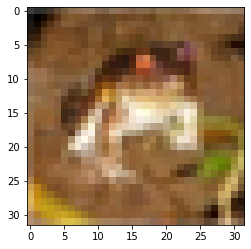

In [7]:
#visualizing first image
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

In [5]:
#visualizing label
print(y_train[0])

[6]


In [8]:
#one hot encoding label
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#changing data from pixel value to 0,1 interval
x_train = x_train/255
x_test = x_test/255

# First Model

In [0]:
#Defining First model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

# two 2d layers(32 neurons) with pooling, and flattening one fully conected layer(1024) and the output(10)  

In [0]:
#Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
#training the model
history = model.fit(x_train, y_train_one_hot,
                    batch_size=256, epochs=10,
                    validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 2s 52us/step - loss: 1.6913 - accuracy: 0.3844 - val_loss: 1.4446 - val_accuracy: 0.4764
Epoch 2/10
35000/35000 [==============================] - 2s 45us/step - loss: 1.3619 - accuracy: 0.5090 - val_loss: 1.2980 - val_accuracy: 0.5376
Epoch 3/10
35000/35000 [==============================] - 2s 45us/step - loss: 1.2141 - accuracy: 0.5689 - val_loss: 1.1992 - val_accuracy: 0.5743
Epoch 4/10
35000/35000 [==============================] - 2s 45us/step - loss: 1.1105 - accuracy: 0.6091 - val_loss: 1.1323 - val_accuracy: 0.6008
Epoch 5/10
35000/35000 [==============================] - 2s 45us/step - loss: 1.0186 - accuracy: 0.6441 - val_loss: 1.0841 - val_accuracy: 0.6167
Epoch 6/10
35000/35000 [==============================] - 2s 45us/step - loss: 0.9532 - accuracy: 0.6665 - val_loss: 1.0396 - val_accuracy: 0.6354
Epoch 7/10
35000/35000 [==============================] - 2s 46us/st

In [17]:
#Evaluating it (67% accuracy)
model.evaluate(x_test,y_test_one_hot)[1]

10000/10000 [==============================] - 1s 73us/step


0.6711000204086304

Visualizing the accuracy and loss

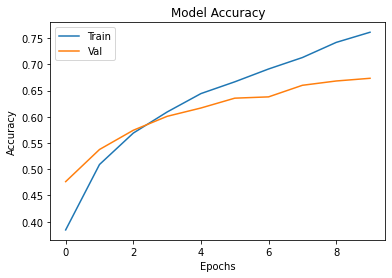

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

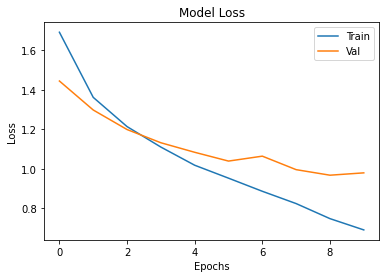

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Second Model

new model made with vgg blocks of 2 layers each(32, 64, 128 neurons), also implementing dropout and a fully connected layer with 128 units this time

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))



In [0]:
#Compiling with custom simple optimizer
optimizer = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [22]:
#training the model
history = model.fit(x_train, y_train_one_hot,
                    batch_size=64, epochs=100,
                    validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 5s 154us/step - loss: 2.0879 - accuracy: 0.2236 - val_loss: 1.9171 - val_accuracy: 0.3232
Epoch 2/100
35000/35000 [==============================] - 5s 139us/step - loss: 1.7616 - accuracy: 0.3477 - val_loss: 1.6304 - val_accuracy: 0.4105
Epoch 3/100
35000/35000 [==============================] - 5s 139us/step - loss: 1.6130 - accuracy: 0.4021 - val_loss: 1.4889 - val_accuracy: 0.4513
Epoch 4/100
35000/35000 [==============================] - 5s 139us/step - loss: 1.5236 - accuracy: 0.4407 - val_loss: 1.4324 - val_accuracy: 0.4799
Epoch 5/100
35000/35000 [==============================] - 5s 139us/step - loss: 1.4417 - accuracy: 0.4707 - val_loss: 1.4159 - val_accuracy: 0.4981
Epoch 6/100
35000/35000 [==============================] - 5s 141us/step - loss: 1.3916 - accuracy: 0.4952 - val_loss: 1.2743 - val_accuracy: 0.5451
Epoch 7/100
35000/35000 [==============================]

In [23]:
#79% accuracy(12% increase)
model.evaluate(x_test,y_test_one_hot)[1]

10000/10000 [==============================] - 1s 98us/step


0.7997000217437744

Visualizing the accuracy and loss data

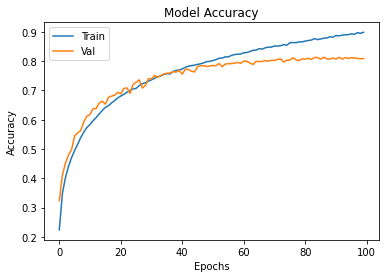

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

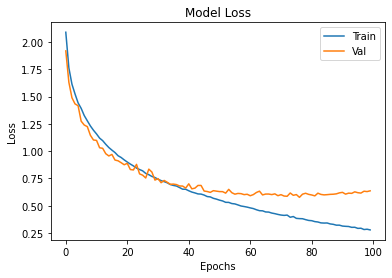

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

This model could be further improved with data augmentation and other possible strategies